# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import json
import csv
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=10)
lngs = np.random.uniform(low=-180.000, high=180.000, size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
pd.DataFrame(cities).head()


,0
0,vaini
1,avarua
2,kodiak
3,rikitea
4,mago


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

results = []

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng =[]
max_temp = []
wind_speed = []

counter = 0
set_counter = 0


for city in cities:
    url = f"{base_url}q={city}&APPID={api_key}"
    weather = requests.get(url).json()
    
    #Jupyter Notebook produces an Error message for the list append statements 
    #if print(json.dumps) statement isn't run first
    #Must "uncomment" print(json.dumps) statement for code to run
    
    pprint(weather)
    
    #Append data to lists
    cloudiness.append(weather['clouds']['all'])
    country.append(weather['sys']['country'])
    date.append(weather['dt'])
    humidity.append(weather['main']['humidity'])
    max_temp.append(weather['main']['temp_max'])
    wind_speed.append(weather['wind']['speed'])
    lat.append(weather['coord']['lat'])
    lng.append(weather['coord']['lon'])
    
    if counter <50:
        counter +=1
    elif counter >=50:
        counter = 0
        set_counter +=1
    print(f"Weather data from {city.upper()} requested: city {counter} out of 49, from set {set_counter}")

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 15.34, 'lon': 74.49},
 'dt': 1571626484,
 'id': 1273574,
 'main': {'humidity': 100,
          'pressure': 1016,
          'temp': 294.66,
          'temp_max': 295.15,
          'temp_min': 294.15},
 'name': 'Vaini',
 'sys': {'country': 'IN',
         'id': 9229,
         'message': 0.0067,
         'sunrise': 1571619286,
         'sunset': 1571661506,
         'type': 1},
 'timezone': 19800,
 'visibility': 6000,
 'weather': [{'description': 'light intensity drizzle',
              'icon': '09d',
              'id': 300,
              'main': 'Drizzle'}],
 'wind': {'deg': 80.124, 'speed': 1}}
Weather data from VAINI requested: city 1 out of 49, from set 0
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -21.21, 'lon': -159.78},
 'dt': 1571626484,
 'id': 4035715,
 'main': {'humidity': 78,
          'pressure': 1014,
          'temp': 299.15,
          'temp_max': 299.15,
          'temp

In [8]:
#Write extracted data into csv file
ls_zip = zip(cities, cloudiness, country, date, humidity, max_temp, wind_speed, lat, lng)

weather_df = pd.DataFrame(data = ls_zip)
weather_df = weather_df.rename(columns = {0:"Cities",
                                          1: "Cloudiness",
                                          2: "Country",
                                          3: "Date",
                                          4: "Humidity",
                                          5: "Max Temp",
                                          6: "Wind Speed",
                                          7: "Latitude",
                                          8: "Longitude"
                                         })
weather_df

,Cities,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,Latitude,Longitude
0,vaini,75,IN,1571626484,100,295.150,1.00,15.34,74.49
1,avarua,0,CK,1571626484,78,299.150,6.20,-21.21,-159.78
2,kodiak,1,US,1571626484,82,287.590,5.10,39.95,-94.76
3,rikitea,94,PF,1571626484,73,294.478,6.79,-23.12,-134.97
4,mago,73,RU,1571626485,71,281.978,1.54,53.27,140.15
5,manokwari,59,ID,1571626485,79,299.558,1.83,-0.87,134.08
6,mahebourg,90,MU,1571626485,94,295.370,3.10,-20.41,57.70
7,terrace,75,CA,1571626485,93,279.150,2.10,54.52,-128.61
8,dingle,100,PH,1571626486,70,302.978,2.69,11.00,122.67


In [9]:
#Write data frame into csv file
weather_df.to_csv("draft_city_weather_data.csv",encoding = 'utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

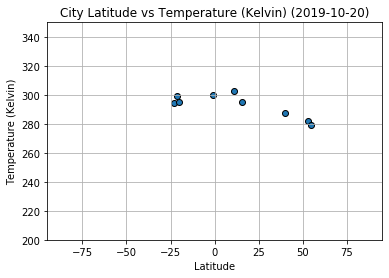

In [10]:
plt.scatter(lat, max_temp, edgecolors = 'k')
plt.xlabel("Latitude")
plt.ylabel("Temperature (Kelvin)")
plt.xlim(-95,95)
plt.ylim(200,350)

plt.grid()

plot_date = datetime.fromtimestamp(weather_df['Date'][0]).date()
plt.title(f"City Latitude vs Temperature (Kelvin) ({plot_date})")
plt.show()


#### Latitude vs. Humidity Plot

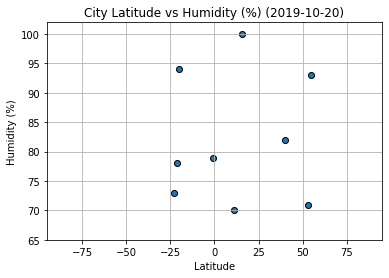

In [18]:
plt.scatter(lat, humidity, edgecolors = 'k')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-95,95)
plt.ylim(65,102)
plt.grid()

plot_date = datetime.fromtimestamp(weather_df['Date'][0]).date()
plt.title(f"City Latitude vs Humidity (%) ({plot_date})")
plt.show()


#### Latitude vs. Cloudiness Plot

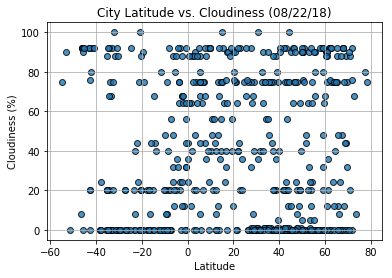

#### Latitude vs. Wind Speed Plot

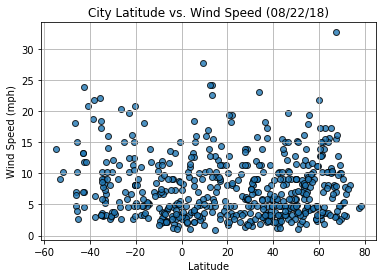